<a href="https://colab.research.google.com/github/hernansalinas/CursoMetodosComputacionales/blob/main/Material_sesiones/ExamenFinal_2024_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Jair Sánchez Sierra

cc: 1003231158

# Evaluación final Métodos computacionales

Profesor: Hernan D. Salinas

Universidad de Antioquia

El examen consta de siete puntos, cada uno con igual valor. Puede utilizar librerías para su solución. La entrega se realiza a través de GitHub. El plazo de entrega es el jueves 8 de agosto a las 11:59 pm. Evite el uso de inteligencia artificial.



En este examen, estudiaremos la caída de un lápiz en posición vertical. El lápiz puede ser modelado como un cuerpo rígido, cuyas ecuaciones de movimiento respecto a su centro de masa pueden ser expresadas de la siguiente manera, de acuerdo con la imagen mostrada en la figura:



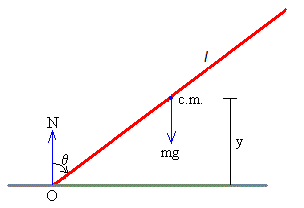


## Ecuaciones de movimiento

### Ecuaciones de movimiento del centro de masa

De acuerdo con la segunda ley de Newton, la ecuación de movimiento a lo largo de la vertical ($y$) puede ser escrita como:

\begin{equation}
m\frac{d^2y}{dt^2} = N - mg
\end{equation}

donde $m$ es la masa del lápiz, $N$ es la fuerza normal y $g$ es la aceleración de la gravedad. Escribiendo las ecuaciones en términos del ángulo $\theta$, tenemos que:

\begin{equation}
-m\frac{l}{2}\cos \theta \left(\frac{d\theta}{dt} \right)^2 - m\frac{l}{2}\sin \theta \frac{d^2\theta}{dt^2} = N - mg
\end{equation}

### Ecuaciones de rotación del centro de masa

La sumatoria de momentos de fuerza se puede escribir como sigue:

\begin{equation}
I_c\frac{d^2\theta}{dt^2} = N\frac{l}{2} \sin \theta
\end{equation}

donde $I_c = \frac{1}{12}ml^2$ es el momento de inercia de una varilla  de masa $m$ y longitud $l$ respecto a un eje perpendicular a la varilla en su centro de masa.

Reemplazando el valor de la normal en la ecuación anterior, obtenemos que la ecuación de movimiento para la posición angular está dada por:

\begin{equation}
\frac{d^2 \theta}{dt^2} = \left( \frac{\frac{2g}{l} - \left(\frac{d\theta}{dt}\right)^2\cos \theta }{\frac{1}{3} + \sin^2 \theta} \right)\sin \theta
\end{equation}

Podemos resolver la ecuación anterior si conocemos las condiciones iniciales: $\theta = \theta_0$ en $t = 0$ y $\frac{d\theta}{dt} = \omega_0 = 0$.

Su tarea en este examen será modelar el movimiento de caída del lápiz. Para ello, asuma que la longitud del lápiz es:

$L = 0.1$ m, $g = 9.8$ m/s² y realice lo siguiente:

1. Utilizando `odeint`, encuentre la solución a la ecuación diferencial para obtener: la posición angular $\theta$, la posición del centro de masa $y = \frac{l}{2}\cos \theta$ y la rapidez angular como función del tiempo, asumiendo que $\theta_0 = \pi/12$, $\omega_0 = 0$.

   Nota: El lápiz llega al piso cuando el ángulo es $\theta = \pi/2$.

2. Empleando `matplotlib`, construya tres gráficos con la información del punto anterior, asegurándose de que tengan las unidades respectivas.

3. Con el programa construido en los puntos 1 y 2, analice el efecto del paso del tiempo en la posición angular, la posición del centro de masa y la rapidez angular. Aproximadamente, ¿a partir de qué tiempo la solución puede ser considerada válida?

4. Con el paso del tiempo calibrado, construya cuatro curvas en una misma figura de la posición angular como función del tiempo, para ángulos iniciales de caída de: $\theta_0 = \pi/12$, $\theta_0 = \pi/6$, $\theta_0 = \pi/4$, $\theta_0 = \pi/3$ y $\omega_0 = 0$.

5. Con los resultados obtenidos, realice una interpolación para cada figura del inciso anterior y encuentre el tiempo de caída, empleando algún método conocido de raíces.

6. El Tiempo que tarda el lápiz en caer $T$, puede ser deducido de la ecuación de conservación de la energía, el cual viene dado por la siguiente integral:  


\begin{equation}
T = \frac{1}{2}\sqrt{\frac{l}{g}} \int_{\theta_0}^{\pi/2} \sqrt{\frac{1/3 + \sin^2 \theta}{\cos \theta_0 - \cos \theta}} \, \mathrm{d}\theta
\end{equation}

Valide sus soluciones del tiempo de caída utilizando la anterior ecuación.

7. Finalmente, realice un gráfico de $T$ como función de $\theta_0$. ¿Qué puede concluir?


**Referencias**: Para más detalle de los cálulos ver:

1. Crawford F. S. Problem: Moments to remember. Am. J. Phys. 57 (2) February 1989, pp. 105, solución 177
2. http://www.sc.ehu.es/sbweb/fisica3/solido/lapiz/lapiz.html

## **SOLUCION**


## Ecuaciones de Movimiento

La ecuación diferencial de segundo orden está dada por:

\begin{equation}
\frac{d^2 \theta}{dt^2} = \left( \frac{\frac{2g}{l} - \left(\frac{d\theta}{dt}\right)^2\cos \theta }{\frac{1}{3} + \sin^2 \theta} \right)\sin \theta
\end{equation}

Se define:

$$
\omega = \frac{d\theta}{dt}
$$

Entonces el sistema de ecuaciones es:

$$
\frac{d\theta}{dt} = \omega
$$

$$
\frac{d\omega}{dt} = \left(\frac{2g}{l} - \omega^2 \cos\theta \right) \frac{\sin\theta}{\frac{1}{3} + \sin^2\theta}
$$


In [1]:
# @title (1) Solución a la ecuación diferencial
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import root_scalar
from scipy.integrate import quad


L = 0.1  #longitud del lápiz (m)
g = 9.8  #aceleración de la gravedad (m/s**2)
theta0 = np.pi / 12  #angulo inicial
omega0 = 0.0  #rapidez angular inicial
t_max = 2.0  #tiempo máximo de simulación (s)
num_pu= 1000  #número de puntos en el tiempo


def ecu_dif(y, t, L, g):  #la ecuación diferencial
    theta, omega = y
    dtheta_dt = omega
    domega_dt = ((2 * g / L) - (omega ** 2) * np.cos(theta)) * np.sin(theta) / (1/3 + np.sin(theta) ** 2)
    return [dtheta_dt, domega_dt]


y0 = [theta0, omega0]  #condiciones iniciales
t = np.linspace(0, t_max, num_pu)


sol_ode = odeint(ecu_dif, y0, t, args=(L, g))  #Solucion usando odeint
theta = sol_ode[:,0]
omega = sol_ode[:,1]
y_cm = (L / 2) * np.cos(theta)

#print(sol_ode)


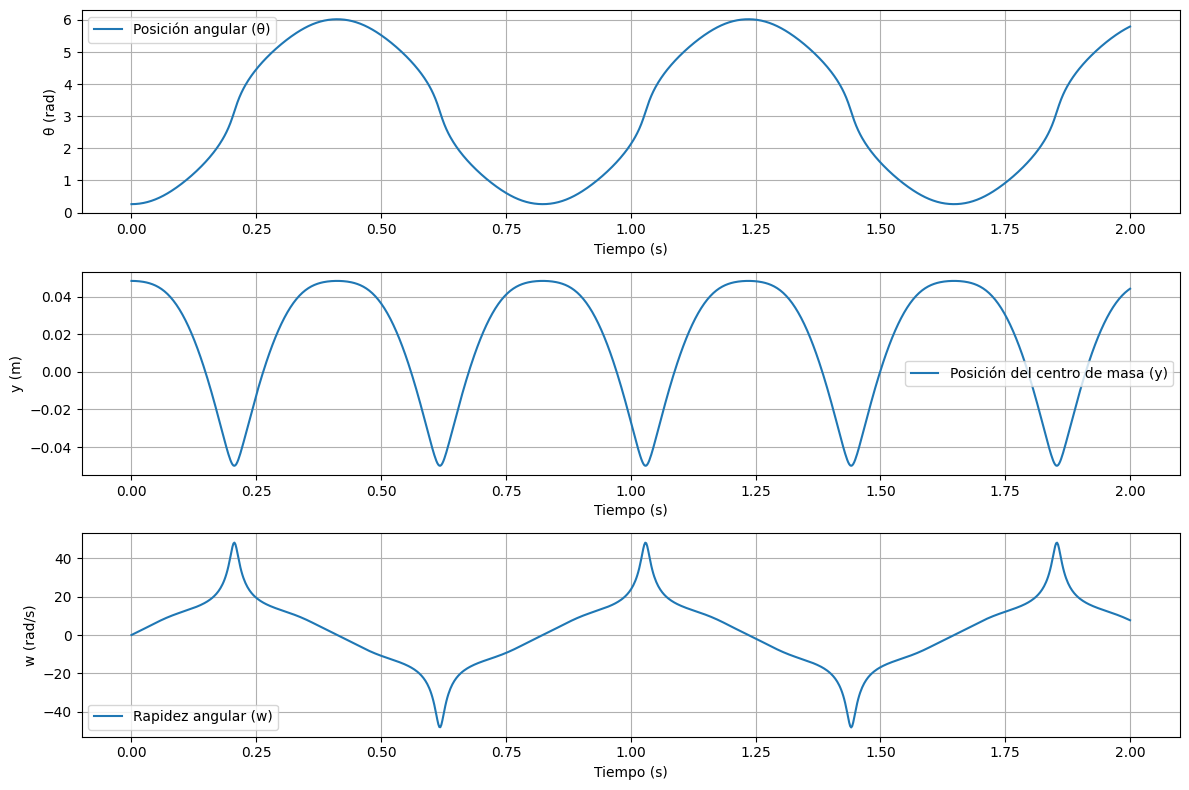

In [2]:
# @title (2) Graficar los resultados

plt.figure(figsize=(12, 8))


plt.subplot(3, 1, 1) #Posición angular vs t
plt.plot(t, theta, label="Posición angular (θ)")
plt.xlabel("Tiempo (s)")
plt.ylabel("θ (rad)")
plt.legend()
plt.grid(True)


plt.subplot(3, 1, 2) #Posición del centro de masa vs t
plt.plot(t, y_cm, label="Posición del centro de masa (y)")
plt.xlabel("Tiempo (s)")
plt.ylabel("y (m)")
plt.legend()
plt.grid(True)


plt.subplot(3, 1, 3) #Rapidez angular vs t
plt.plot(t, omega, label="Rapidez angular (w)")
plt.xlabel("Tiempo (s)")
plt.ylabel("w (rad/s)")
plt.grid(True)

plt.legend()
plt.tight_layout()
plt.show()

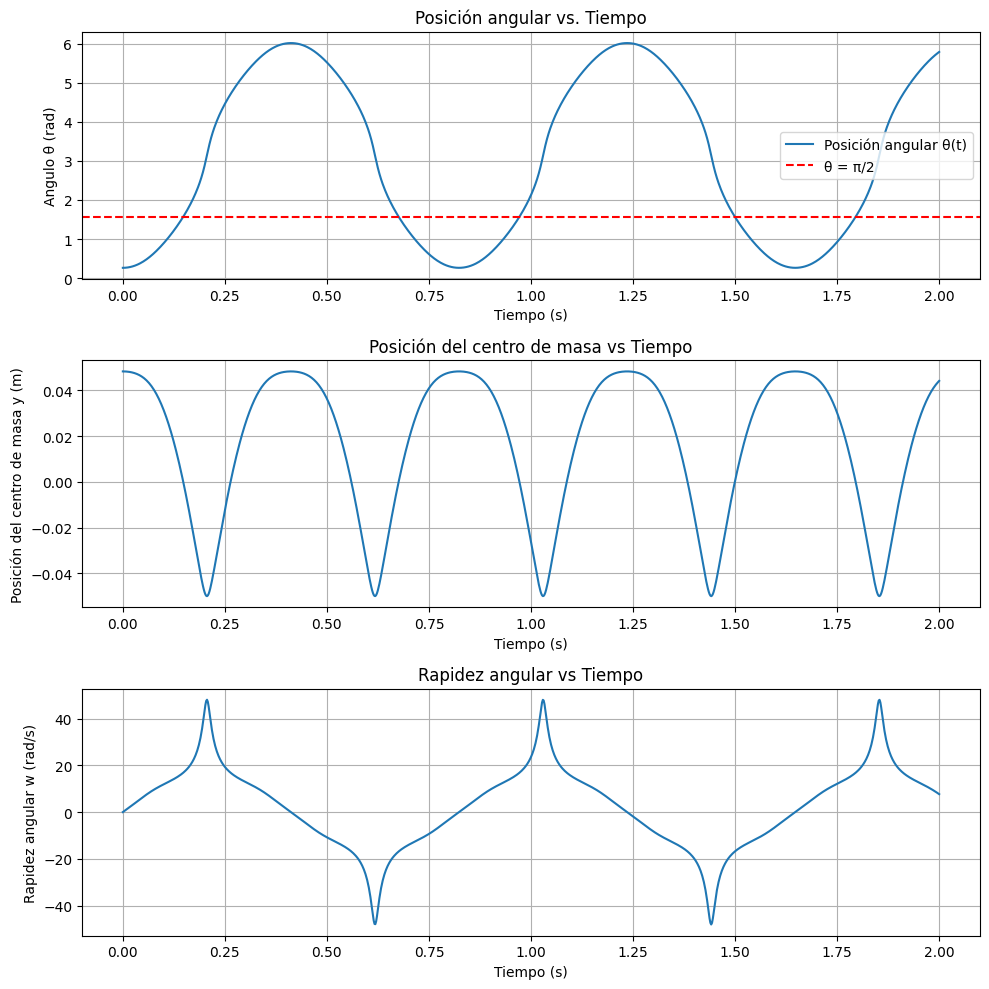

In [3]:
# @title (3) Efecto del paso del tiempo


t = np.linspace(0, 2, 1000)

plt.figure(figsize=(10, 10))

plt.subplot(3, 1, 1) #posición angular vs t
plt.plot(t, theta, label="Posición angular θ(t)")
plt.axhline(np.pi / 2, color="r", linestyle="--", label="θ = π/2")
plt.xlabel("Tiempo (s)")
plt.ylabel("Angulo θ (rad)")
plt.title("Posición angular vs. Tiempo")
plt.legend()
plt.grid(True)


plt.subplot(3, 1, 2)   #posición del centro de masa vs t
plt.plot(t, y_cm, label="Posición del centro de masa y(t)")
plt.xlabel("Tiempo (s)")
plt.ylabel("Posición del centro de masa y (m)")
plt.title("Posición del centro de masa vs Tiempo")
plt.grid(True)


plt.subplot(3, 1, 3)  #rapidez angular vs t
plt.plot(t, omega, label="Rapidez angular w(t)")
plt.xlabel("Tiempo (s)")
plt.ylabel("Rapidez angular w (rad/s)")
plt.title("Rapidez angular vs Tiempo")
plt.grid(True)

plt.tight_layout()
plt.show()


Observando el gráfico de la posición angular, la solución es válida hasta el punto en que θ alcanza π/2, ya que en ese momento el lápiz toca el suelo y no es necesario continuar la simulación.

Por lo que el tiempo a partir del cual la solución deja de ser válida es cuando el ángulo θ alcanza π/2. Este tiempo marca el final del movimiento principal, que observando la grafica puede suponerse más o menos de 0.1 s.

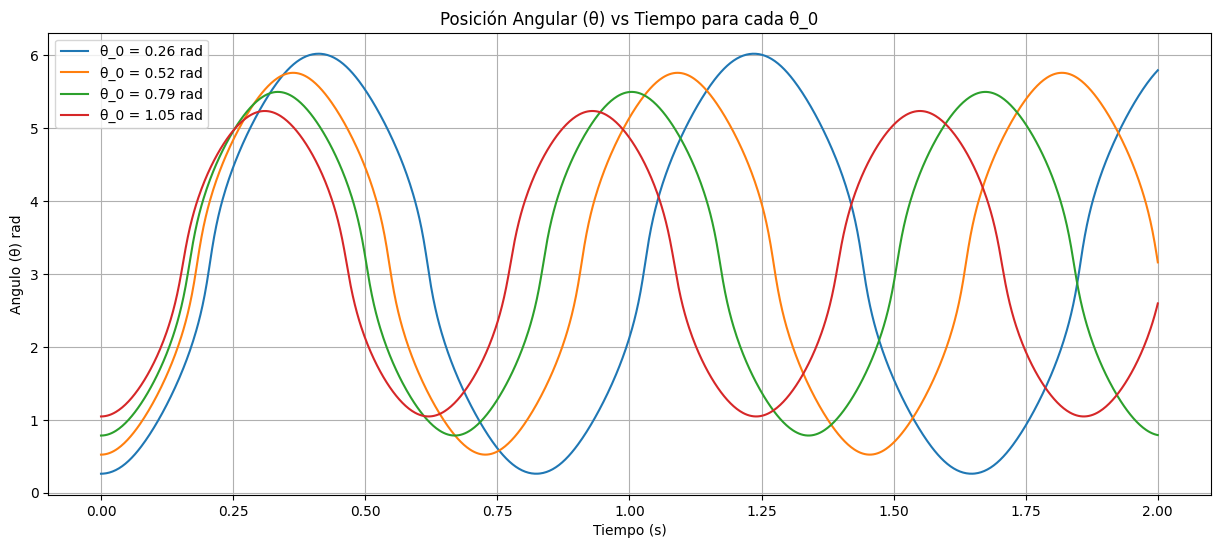

In [4]:
# @title (4) Diferentes angulos iniciales

num_pu = 1000
t_max = 2.0

theta0_val = [np.pi/12, np.pi/6, np.pi/4, np.pi/3]
t = np.linspace(0, t_max, num_pu)

plt.figure(figsize=(15, 6))
for theta0 in theta0_val:
    y0 = [theta0, omega0]
    solution = odeint(ecu_dif, y0, t, args=(L, g))
    theta = solution[:, 0]
    plt.plot(t, theta, label=f"θ_0 = {theta0:.2f} rad")

plt.title("Posición Angular (θ) vs Tiempo para cada θ_0")
plt.xlabel("Tiempo (s)")
plt.ylabel("Angulo (θ) rad")
plt.legend()
plt.grid(True)
plt.show()


El tiempo de caída estimado con biseccion es: 0.0842 s


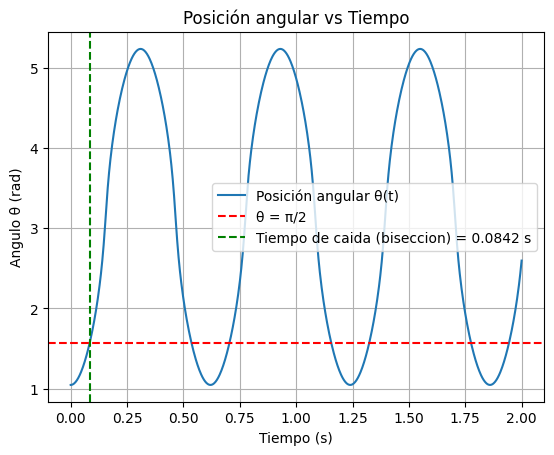

In [5]:
# @title (5) Interpolación


def theta_(t_val):   #funcion para encontrar la raíz (cuando θ = π/2)
    sol_t = odeint(ecu_dif, y0, [0, t_val],args=(L, g))
    return sol_t[-1, 0] - np.pi/2


raiz_bisec = root_scalar(theta_, bracket=[0, 1], method="bisect") #la raíz con bisección
tiempo_caida = raiz_bisec.root

print(f"El tiempo de caída estimado con biseccion es: {tiempo_caida:.4f} s")


plt.figure()
plt.plot(t, theta, label="Posición angular θ(t)")
plt.axhline(np.pi / 2, color="r", linestyle="--", label="θ = π/2")
plt.axvline(tiempo_caida, color="g", linestyle="--", label=f"Tiempo de caida (biseccion) = {tiempo_caida:.4f} s")
plt.xlabel("Tiempo (s)")
plt.ylabel("Angulo θ (rad)")
plt.title("Posición angular vs Tiempo")
plt.legend()
plt.grid(True)
plt.show()

El tiempo de caida estimado con interpolación es: 0.0842 s


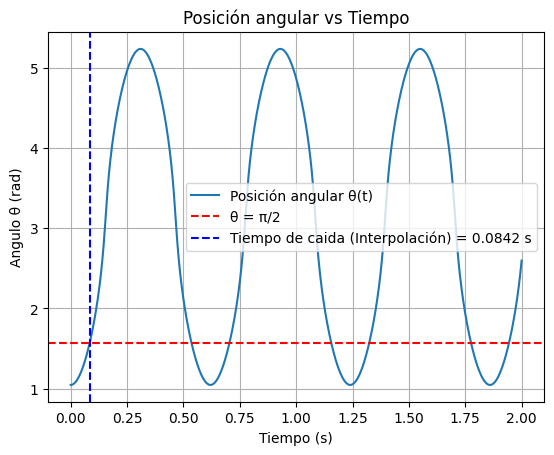

In [6]:

tiempo_caida_inter = np.interp(np.pi/2, theta, t)  #Interpolación

print(f"El tiempo de caida estimado con interpolación es: {tiempo_caida_inter:.4f} s")


plt.figure()
plt.plot(t, theta, label="Posición angular θ(t)")
plt.axhline(np.pi / 2, color="r", linestyle="--", label="θ = π/2")
plt.axvline(tiempo_caida_inter, color="b", linestyle="--", label=f"Tiempo de caida (Interpolación) = {tiempo_caida_inter:.4f} s")
plt.xlabel("Tiempo (s)")
plt.ylabel("Angulo θ (rad)")
plt.title("Posición angular vs Tiempo")
plt.legend()
plt.grid(True)
plt.show()


In [7]:
#@title (6) Verificación del tiempo de caida

factor = np.sqrt(2 * L / g)


def integral(theta, theta0):
    return 1 / (np.sqrt((1/3) + np.sin(theta)**2) * np.sqrt(np.cos(theta0) - np.cos(theta)))


integral_val, error = quad(integral, theta0, np.pi/2, args=(theta0,))


T_integral = factor * integral_val  #tiempo de caida

print(f"El tiempo de caida calculado mediante la integral es: {T_integral:.4f} s")


El tiempo de caida calculado mediante la integral es: 0.1996 s


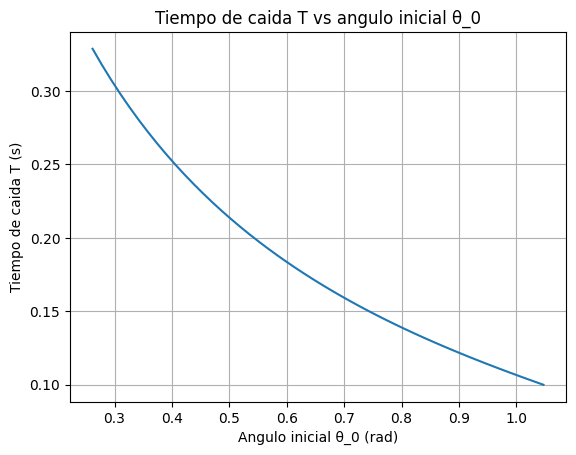

In [8]:
# @title (7) Grafica T vs θ_0

def tiempo_de_caida(theta0):
    integral__, _ = quad(integral, theta0, np.pi/2, args=(theta0,))
    T = np.sqrt(L / (2 * g)) * integral__
    return T




plt.figure()  #tiempo de caída vs ángulo inicial
val_theta= np.linspace(np.pi / 12, np.pi / 3, 50)
tiempos_ca = [tiempo_de_caida(theta0) for theta0 in val_theta]

plt.plot(val_theta, tiempos_ca)
plt.xlabel("Angulo inicial θ_0 (rad)")
plt.ylabel("Tiempo de caida T (s)")
plt.title("Tiempo de caida T vs angulo inicial θ_0")
plt.grid(True)
plt.show()


La grafica nos muestra que el tiempo de caida T del lápiz depende de manera no lineal del angulo inicial θ_0.

Se puede notar que a medida que θ_0 aumenta, el tiempo de caida disminuye, ya que el lápiz comienza más cerca del suelo.

El tiempo de caída mediante la integral se acerca a los resultados obtenidos por métodos numéricos, confirmando alta precisión de estos los metodos y buena formulación física del problema.